# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

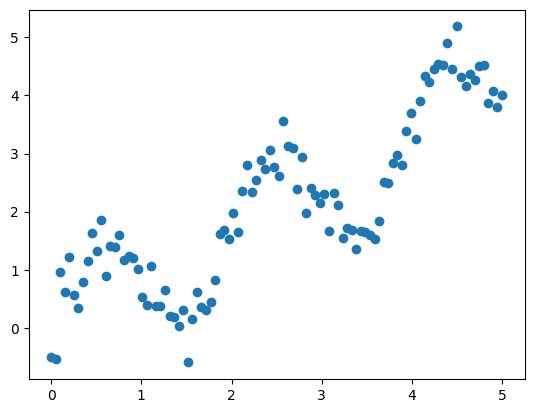

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.6146799405495588


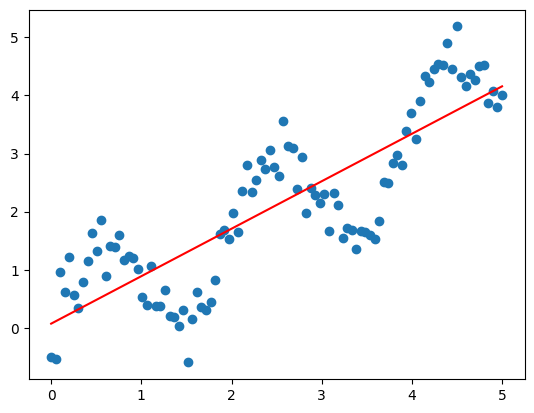

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

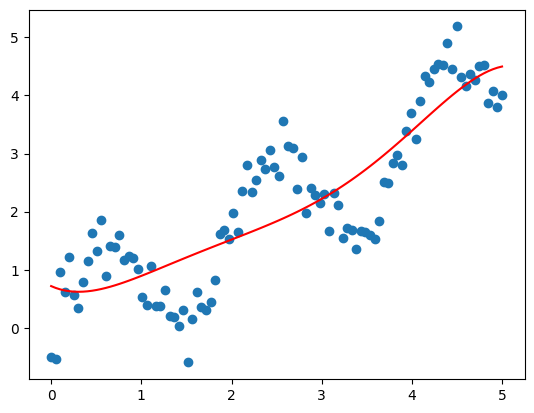

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.70471165  1.46985099 -0.74895656  0.17339637 -0.01414333]
interception:  0.7193152745371081


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.71931527, 0.68737765, 0.66237525, 0.64376907, 0.63104608,
       0.62371865, 0.621324  , 0.62342362, 0.62960276, 0.63946982,
       0.65265582, 0.66881383, 0.68761844, 0.70876515, 0.73196989,
       0.75696836, 0.78351558, 0.81138524, 0.84036921, 0.87027695,
       0.90093494, 0.93218617, 0.96388952, 0.99591926, 1.02816446,
       1.06052843, 1.09292817, 1.12529384, 1.15756814, 1.18970582,
       1.22167306, 1.25344698, 1.285015  , 1.31637437, 1.34753154,
       1.37850165, 1.40930794, 1.43998123, 1.4705593 , 1.50108641,
       1.53161269, 1.56219358, 1.59288931, 1.62376431, 1.65488666,
       1.68632754, 1.71816068, 1.75046176, 1.78330791, 1.8167771 ,
       1.85094762, 1.88589751, 1.92170401, 1.95844296, 1.99618831,
       2.0350115 , 2.07498097, 2.11616152, 2.15861381, 2.20239379,
       2.24755215, 2.29413372, 2.34217699, 2.39171345, 2.44276714,
       2.49535401, 2.5494814 , 2.60514749, 2.6623407 , 2.72103918,
       2.78121023, 2.84280974, 2.90578164, 2.97005734, 3.03555

In [15]:
regr_poly.predict(X_poly)

array([0.71931527, 0.68737765, 0.66237525, 0.64376907, 0.63104608,
       0.62371865, 0.621324  , 0.62342362, 0.62960276, 0.63946982,
       0.65265582, 0.66881383, 0.68761844, 0.70876515, 0.73196989,
       0.75696836, 0.78351558, 0.81138524, 0.84036921, 0.87027695,
       0.90093494, 0.93218617, 0.96388952, 0.99591926, 1.02816446,
       1.06052843, 1.09292817, 1.12529384, 1.15756814, 1.18970582,
       1.22167306, 1.25344698, 1.285015  , 1.31637437, 1.34753154,
       1.37850165, 1.40930794, 1.43998123, 1.4705593 , 1.50108641,
       1.53161269, 1.56219358, 1.59288931, 1.62376431, 1.65488666,
       1.68632754, 1.71816068, 1.75046176, 1.78330791, 1.8167771 ,
       1.85094762, 1.88589751, 1.92170401, 1.95844296, 1.99618831,
       2.0350115 , 2.07498097, 2.11616152, 2.15861381, 2.20239379,
       2.24755215, 2.29413372, 2.34217699, 2.39171345, 2.44276714,
       2.49535401, 2.5494814 , 2.60514749, 2.6623407 , 2.72103918,
       2.78121023, 2.84280974, 2.90578164, 2.97005734, 3.03555

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

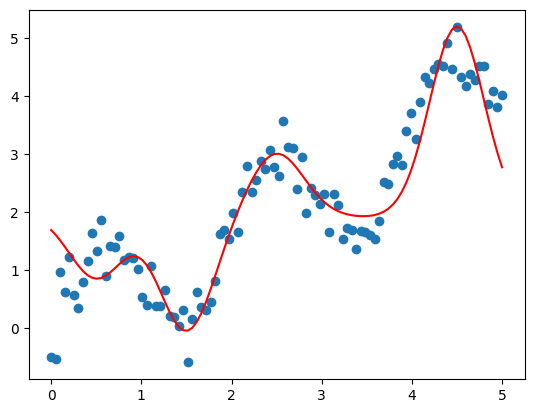

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.105836   -2.01258309  1.04790952 -0.05175447  3.23191156]
interception:  1.962042849879744


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

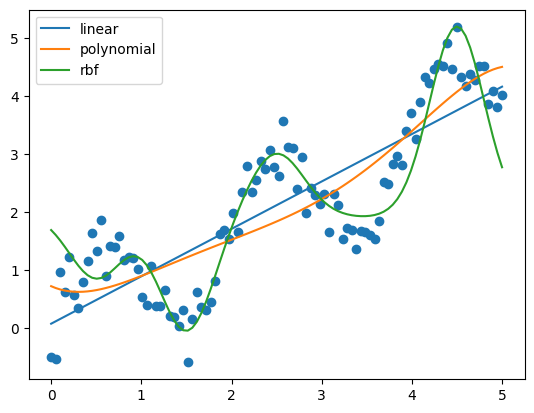

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6146799405495588


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.55358872260399


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2942435831443093
